In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.approximation.clustering_coefficient as nx_cluster
import networkx.algorithms.shortest_paths.generic as nx_shortest_path
import random

In [3]:
def cargar_datos(filename):
    df = pd.read_csv(filename, sep=',', error_bad_lines=False, header = None)
    df.drop([0,1,2,4], axis = 1, inplace = True)

    df[3] = df[3].astype(str)
    
    lista_inter_autores = [((x.iat[0]).lstrip()).split(" & ") for index, x in df.iterrows()]
    lista_inter_autores

    grafo = nx.Graph()
    for autores in lista_inter_autores:
        if len(autores) == 1:
            grafo.add_node(autores[0])
        else:
            vecinos = lista_pares(autores)
            grafo.add_edges_from(vecinos)

    return grafo

def lista_pares(autores):
    lista = []
    for i in range(len(autores) -1):
        for j in range(i+ 1, len(autores)):
            aux = (autores[i], autores[j])
            lista.append(aux)
    return lista


grafo = cargar_datos('data.csv')


b'Skipping line 14: expected 5 fields, saw 6\nSkipping line 49: expected 5 fields, saw 6\nSkipping line 55: expected 5 fields, saw 6\nSkipping line 74: expected 5 fields, saw 6\nSkipping line 76: expected 5 fields, saw 7\nSkipping line 82: expected 5 fields, saw 7\nSkipping line 84: expected 5 fields, saw 6\nSkipping line 98: expected 5 fields, saw 6\nSkipping line 142: expected 5 fields, saw 6\nSkipping line 144: expected 5 fields, saw 6\nSkipping line 159: expected 5 fields, saw 6\nSkipping line 177: expected 5 fields, saw 6\nSkipping line 221: expected 5 fields, saw 6\nSkipping line 224: expected 5 fields, saw 6\nSkipping line 287: expected 5 fields, saw 6\nSkipping line 322: expected 5 fields, saw 6\nSkipping line 324: expected 5 fields, saw 6\nSkipping line 325: expected 5 fields, saw 6\nSkipping line 326: expected 5 fields, saw 6\nSkipping line 354: expected 5 fields, saw 6\nSkipping line 386: expected 5 fields, saw 12\nSkipping line 398: expected 5 fields, saw 7\nSkipping line 3

In [4]:
histo = nx.degree_histogram(grafo)

# 1) Representación gáfica del grafo.

### Tener en consideración que el grafo es muy grande, queremos quedarnos con un subgrafo que mantenga la distribución de vecinos.

# 2) Distribución de Grado
## Escala lineal

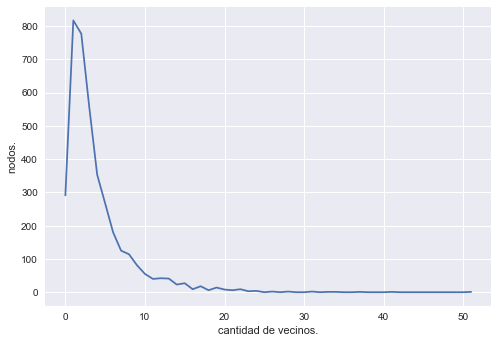

In [5]:
plt.plot(histo)
plt.xlabel("cantidad de vecinos.")
plt.ylabel("nodos.")
plt.show()

## Escala semilogarítmica eje y.

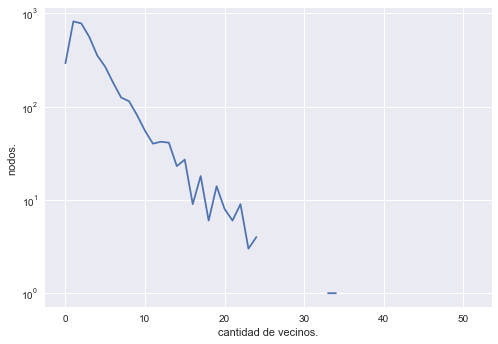

In [6]:
plt.semilogy(histo)
plt.xlabel("cantidad de vecinos.")
plt.ylabel("nodos.")
plt.show()
#la posta

## Escala logarítmica, eje x e y.

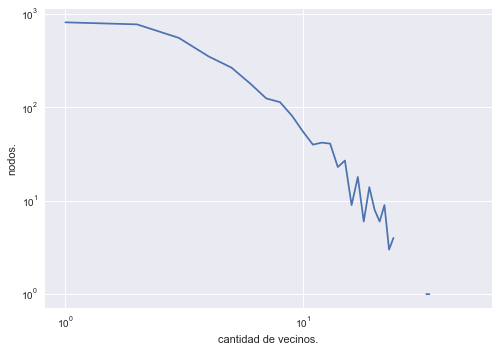

In [7]:
plt.loglog(histo)
plt.xlabel("cantidad de vecinos.")
plt.ylabel("nodos.")
plt.show()

# 3)Calcule el número de componentes conexas del grafo. Muestre el tamaño de la componente mayor (componente gigante).

In [8]:
numeros = nx.algorithms.components.number_connected_components(grafo)

In [9]:
print(numeros)

526


In [10]:
print("la cantidad de componentes conexas sin tomar en cuenta los nodos que tienen grado 0: ")
print(numeros- histo[0])


la cantidad de componentes conexas sin tomar en cuenta los nodos que tienen grado 0: 
235


In [11]:
mayor_componente = max(nx.algorithms.components.connected_component_subgraphs(grafo), key = len)
print(len(mayor_componente))

2920


# 4) Tamaño de vecindades.
##### Trabajando con la componente gigante del grafo, estudie, parándose en un nodo al azar, cómo aume el número de autores alcanzados a medida que se aleja del nodo semilla. Grafique el número de autores alcanzados en función de la distancia al nodo semilla. Grafique también el número de nuevos autores que se agregan en cada paso, y estime el máximo de esta función. Pruebe con varios nodos semillas y analice la robustez de este resultado. Discuta el significado de los gráficos y su relación con el fenómeno de seis grados de separación.

In [23]:
def vecindad_nodo(indice, mayor_componente):
    lista = list(mayor_componente.nodes())
    nodo_semilla = lista[indice]
    nodos_marcados = set([nodo_semilla])
    agregados = []
    vecinos_grado =set([n for n in mayor_componente.neighbors(nodo_semilla)]) 
    while len(nodos_marcados) < len(mayor_componente):
        #los no marcados.
        vecinos_grado = vecinos_grado.difference(nodos_marcados)
        agregados.append(len(vecinos_grado))

        vecinos_grado_proximo = set([])
        for vecino in vecinos_grado:
                vecinos_grado_proximo = vecinos_grado_proximo.union(set([n for n in mayor_componente.neighbors(vecino)]))
        nodos_marcados = nodos_marcados.union(vecinos_grado)

        vecinos_grado = vecinos_grado_proximo
    return agregados

def vecindad_nodos(conjunto_indice):
    lista_distribuciones = []
    for ind in conjunto_indice:
        lista_agregados = vecindad_nodo(ind)
        lista_distribuciones.append(lista_agregados)
    return lista_distribuciones


In [57]:
#elementos = 20#random.randint(0, len(mayor_componente) -1)
lista_random = list(map(lambda x: random.randint(0, len(mayor_componente)-1), range(20)))
lista_distribuciones = vecindad_nodos(set(lista_random))
#print(lista_distribuciones)

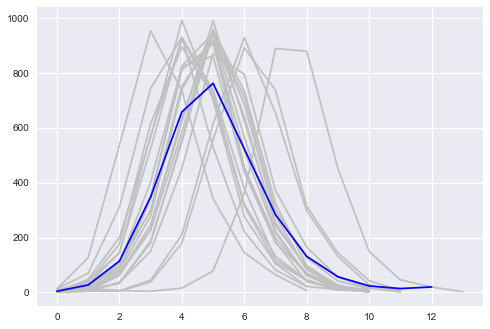

máximo índice:  [5]
máximo valor:  761.2 761.2


In [48]:
for dist in lista_distribuciones:
    plt.plot(dist, 'silver')
    
max_length_dist = 0
for dist in lista_distribuciones:
    max_length_dist = max(max_length_dist, len(dist))

mean_dist = []
for i in range(max_length_dist-1):
    i_elements = []
    for dist in lista_distribuciones:
        if len(dist) > i:
            i_elements.append(dist[i])
    mean_dist.append(np.mean(i_elements))

plt.plot(mean_dist, 'blue')
plt.show()

m = max(mean_dist)
argmax = [i for i, j in enumerate(mean_dist) if j == m]
print('máximo índice: ', argmax)
print('máximo valor: ', mean_dist[5], m)

# 5: Mundos pequeños

In [56]:
clustering_c = nx_cluster.average_clustering(mayor_componente)
print('coeficiente de clustering C: ', clustering_c)

mean_shortest_path = nx_shortest_path.average_shortest_path_length(mayor_componente)
print('media de caminos mínimos: ', mean_shortest_path)

coeficiente de clustering C:  0.509
media de caminos mínimos:  6.213882123264207


# 6: Estrellas

In [60]:
mayor_coautor = nx.algorithms.centrality.degree_centrality(mayor_componente)
mayor_conector = nx.algorithms.centrality.betweenness_centrality(mayor_componente)

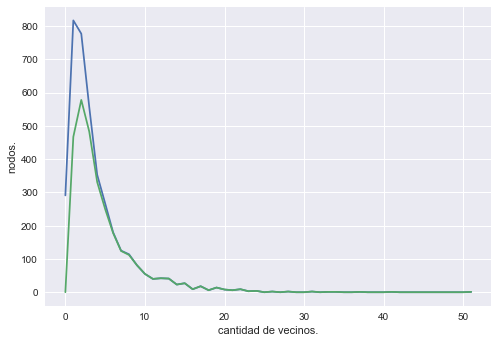

In [61]:
histo_comp = nx.degree_histogram(mayor_componente)

plt.plot(histo)
plt.plot(histo_comp)
plt.xlabel("cantidad de vecinos.")
plt.ylabel("nodos.")
plt.show()